# Detecting Climate Disinformation based on text from news articles : Explore the Data 

## Import Python Packages

In [2]:
from collections import Counter
from datetime import datetime
from pprint import pprint

from datasets import (load_dataset_builder,
                      load_dataset,
                      get_dataset_split_names)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

import pandas as pd

from tqdm import tqdm

from utils.evaluation import TextEvaluationRequest


print('All packages imported successfully!')

All packages imported successfully!


## Explore the Dataset

In [3]:
request = TextEvaluationRequest()

# Load and prepare the dataset
dataset = load_dataset(request.dataset_name, split="train+test")

In [4]:
print(f"ROWS: {dataset.num_rows}")
print(f"COLUMNS: {dataset.num_columns}")

ROWS: 6091
COLUMNS: 8


In [7]:
print(f"COLUMN NAMES: {dataset.column_names}")

COLUMN NAMES: ['quote', 'label', 'source', 'url', 'language', 'subsource', 'id', '__index_level_0__']


In [8]:
pprint(dataset.info.features)


{'__index_level_0__': Value(dtype='int64', id=None),
 'id': Value(dtype='null', id=None),
 'label': Value(dtype='string', id=None),
 'language': Value(dtype='string', id=None),
 'quote': Value(dtype='string', id=None),
 'source': Value(dtype='string', id=None),
 'subsource': Value(dtype='string', id=None),
 'url': Value(dtype='string', id=None)}


In [9]:
# EXAMPLE ROW
pprint(dataset[0])

{'__index_level_0__': 1109,
 'id': None,
 'label': '0_not_relevant',
 'language': 'en',
 'quote': 'Interesting to note that Oklahoma minimum temperatures in 2011 were '
          'in the bottom ten, including the coldest Oklahoma temperature ever '
          'recorded, -31F on February 10, 2011.',
 'source': 'FLICC',
 'subsource': 'CARDS',
 'url': 'https://huggingface.co/datasets/fzanartu/FLICCdataset'}


In [10]:
# Get unique values from the 'language' column
dataset.unique('language')

['en']

In [11]:
# Get the count of unique URLs
len(dataset.unique('url'))

780

In [12]:
# Get unique values from the 'source' column
pprint(dataset.unique('source'))

['FLICC', 'Desmog']


In [45]:
source_counts = Counter(entry['source'] for entry in dataset)
pprint(source_counts)

Counter({'Desmog': 4295, 'FLICC': 1796})


In [13]:
# Get unique values from the 'subsource' column
pprint(dataset.unique('subsource'))

['CARDS',
 'hamburg_test3',
 None,
 'jindev',
 'jintrain',
 'hamburg_test2',
 'Alhindi_train',
 'hamburg_test1',
 'jintest',
 'Alhindi_test',
 'Alhindi_dev']


In [47]:
subsource_counts = Counter(entry['subsource'] for entry in dataset)
pprint(subsource_counts)

Counter({None: 4295,
         'CARDS': 689,
         'hamburg_test3': 419,
         'jintrain': 192,
         'hamburg_test2': 172,
         'hamburg_test1': 107,
         'jindev': 78,
         'Alhindi_train': 63,
         'jintest': 39,
         'Alhindi_dev': 19,
         'Alhindi_test': 18})


In [14]:
# Get the count of unique quotes
len(dataset.unique('quote'))

6091

In [15]:
# Get unique values from the 'label' column
dataset.unique('label')

['0_not_relevant',
 '6_proponents_biased',
 '3_not_bad',
 '2_not_human',
 '1_not_happening',
 '4_solutions_harmful_unnecessary',
 '5_science_unreliable',
 '7_fossil_fuels_needed']

In [16]:
# Get unique values from the 'id' column
dataset.unique('id')

[None]

In [18]:
# Get the count of unique index values.
len(dataset.unique('__index_level_0__'))

6091

We would like to understand some properties of the data. As a start, let's analyze the lengths of different sentences in the  `quote` column. 
We will make a histogram of the number of words in each quote over the full corpus.

In [5]:
def count_tokens(entry):
    return {"num_tokens": len(entry["quote"].split())}

dataset = dataset.map(count_tokens)

In [42]:
len(dataset.unique('num_tokens'))

241

In [61]:
token_count_frequency = Counter(dataset['num_tokens'])
sorted_token_count_frequency = dict(sorted(token_count_frequency.items()))
pprint(sorted_token_count_frequency)

{3: 1,
 4: 4,
 5: 11,
 6: 14,
 7: 23,
 8: 29,
 9: 30,
 10: 37,
 11: 100,
 12: 75,
 13: 92,
 14: 106,
 15: 98,
 16: 95,
 17: 96,
 18: 100,
 19: 110,
 20: 142,
 21: 107,
 22: 112,
 23: 113,
 24: 121,
 25: 134,
 26: 100,
 27: 106,
 28: 113,
 29: 116,
 30: 101,
 31: 123,
 32: 103,
 33: 86,
 34: 106,
 35: 91,
 36: 84,
 37: 115,
 38: 98,
 39: 83,
 40: 93,
 41: 83,
 42: 86,
 43: 76,
 44: 78,
 45: 74,
 46: 90,
 47: 70,
 48: 74,
 49: 66,
 50: 84,
 51: 52,
 52: 56,
 53: 50,
 54: 66,
 55: 49,
 56: 45,
 57: 54,
 58: 57,
 59: 44,
 60: 45,
 61: 52,
 62: 34,
 63: 38,
 64: 49,
 65: 38,
 66: 32,
 67: 51,
 68: 34,
 69: 59,
 70: 35,
 71: 35,
 72: 43,
 73: 38,
 74: 34,
 75: 26,
 76: 23,
 77: 24,
 78: 20,
 79: 23,
 80: 29,
 81: 12,
 82: 31,
 83: 20,
 84: 21,
 85: 23,
 86: 24,
 87: 24,
 88: 16,
 89: 14,
 90: 17,
 91: 22,
 92: 19,
 93: 15,
 94: 14,
 95: 12,
 96: 15,
 97: 9,
 98: 13,
 99: 15,
 100: 14,
 101: 10,
 102: 12,
 103: 6,
 104: 8,
 105: 7,
 106: 10,
 107: 7,
 108: 14,
 109: 19,
 110: 8,
 111: 6,
 112

In [62]:
import statistics

# Extract the num_tokens column
num_tokens = dataset['num_tokens']

# Calculate mean
mean_tokens = statistics.mean(num_tokens)

# Calculate median
median_tokens = statistics.median(num_tokens)

# Calculate mode
mode_tokens = statistics.mode(num_tokens)

print(f"Mean: {mean_tokens}")
print(f"Median: {median_tokens}")
print(f"Mode: {mode_tokens}")

Mean: 48.85470366113939
Median: 38
Mode: 20


In [19]:
def make_histogram(dataset):
  
  num_tokens = []  # each sentence should add an integer to this list.

  # Make a histogram of the lengths of sentences in the dataset.
  pbar = tqdm(total=len(dataset), leave=True, position=0)
  for entry in dataset:
    tokens = entry['quote'].split()
    num_tokens.append(len(tokens))
    pbar.update()
  pbar.close()

  plt.figure()
  plt.hist(num_tokens, bins=1000)
  plt.xlabel('Number of tokens')
  plt.xlim(0, 1000)
  plt.show()
  return num_tokens

100%|██████████| 6091/6091 [00:00<00:00, 12656.72it/s]


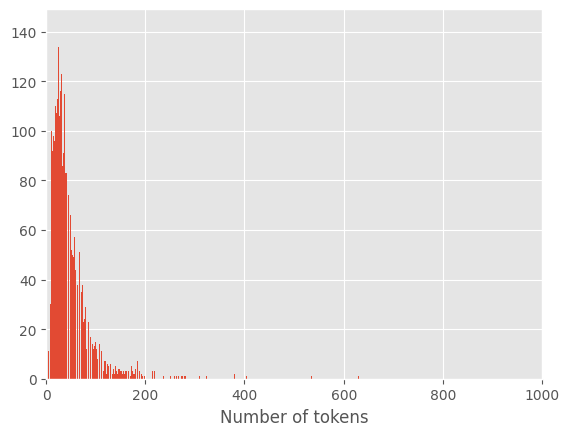

In [20]:
num_tokens = make_histogram(dataset)

In [58]:
# Filter rows where num_tokens is equal to 1
rows_with_one_token = [entry for entry in dataset if entry['num_tokens'] == 1]

# Print the filtered rows
pprint(rows_with_one_token)

[]


In [21]:
# Q: How many words is the shortest quote and how many quotes have that length?

from collections import Counter

token_counter = Counter(num_tokens)
shortest = min(num_tokens)
longest = max(num_tokens)

num_shortest = token_counter[shortest]
num_longest = token_counter[longest]

print(f'{num_shortest} quotes have {shortest} tokens.')
print(f'{num_longest} quotes has {longest} tokens.')

1 quotes have 3 tokens.
1 quotes has 789 tokens.


In [23]:
# print out the shortest entry
for entry in dataset:
  if len(entry['quote'].split()) == shortest:
    pprint(entry)

{'__index_level_0__': 277,
 'id': None,
 'label': '3_not_bad',
 'language': 'en',
 'quote': 'reefs are improving',
 'source': 'FLICC',
 'subsource': 'hamburg_test3',
 'url': 'https://huggingface.co/datasets/fzanartu/FLICCdataset'}


In [24]:
# print out the longest entry

max_tokens = 0
longest_quote = None

for entry in dataset:
    tokens = entry['quote'].split()
    if len(tokens) > max_tokens:
        longest_quote = entry['quote']
        max_tokens = len(tokens)

In [25]:
pprint(longest_quote)

('Hubris is a Greek word that means dangerously overconfident. Based on my '
 'research, hubris fairly describes our current response to the issue of '
 'climate change Here’s what many people believe One: The planet is warming '
 'catastrophically because of certain human behaviors Two: Thanks to powerful '
 'computers we can project what the climate will be like 20, 40, or even 100 '
 'years from now Three: That if we eliminate just one behavior, the burning of '
 'fossil fuels, we can prevent the climate from changing for as long we like '
 'Each of these presumptions—together, the basis of our hubris regarding the '
 'changing climate—is either untrue or so far off the mark as to be useless '
 'Yes, it’s true that the globe is warming, and that humans are exerting a '
 'warming influence upon it. But beyond that, to paraphrase a line from the '
 'classic movie The Princess Bride, ‘I do not think “The Science” says what '
 'you think it says. For example, government reports state cl

In [27]:
# print out the longest entry
for entry in dataset:
  if len(entry['quote'].split()) == longest:
    pprint(entry)

{'__index_level_0__': 4243,
 'id': None,
 'label': '5_science_unreliable',
 'language': 'en',
 'quote': 'Hubris is a Greek word that means dangerously overconfident. Based '
          'on my research, hubris fairly describes our current response to the '
          'issue of climate change Here’s what many people believe One: The '
          'planet is warming catastrophically because of certain human '
          'behaviors Two: Thanks to powerful computers we can project what the '
          'climate will be like 20, 40, or even 100 years from now Three: That '
          'if we eliminate just one behavior, the burning of fossil fuels, we '
          'can prevent the climate from changing for as long we like Each of '
          'these presumptions—together, the basis of our hubris regarding the '
          'changing climate—is either untrue or so far off the mark as to be '
          'useless Yes, it’s true that the globe is warming, and that humans '
          'are exerting a warming i

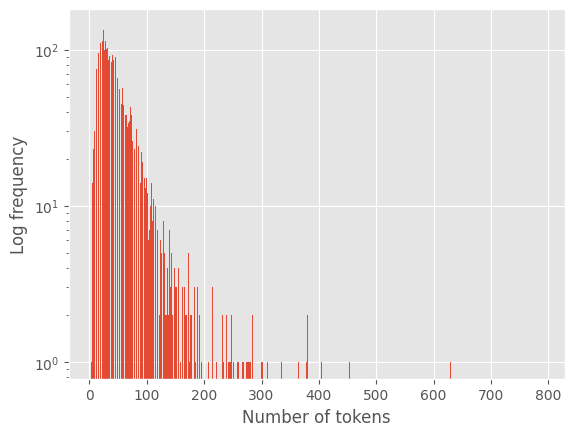

In [28]:
# Re-plot the histogram in log frequency space.
plt.figure()
plt.hist(num_tokens, bins=1000, log=True)
plt.xlabel('Number of tokens')
plt.ylabel('Log frequency')
plt.show()

### Vocabulary Analysis

100%|██████████| 6091/6091 [00:00<00:00, 9861.17it/s] 


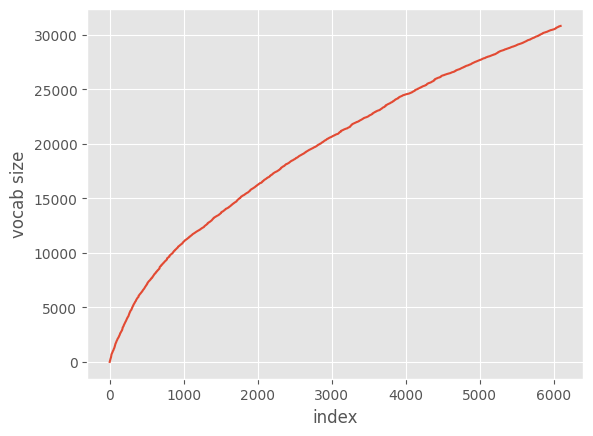

In [30]:
from collections import defaultdict

vocab = defaultdict(lambda: 0)
# after 0 sentences, vocab size is at 0.
vocab_sizes = [0]

# Plot the vocabulary against the number of sentences.
for i in tqdm(range(len(dataset)), leave=True, position=0):
  entry = dataset[i]
  tokens = entry['quote'].split()
  for token in tokens:
    vocab[token] += 1
  vocab_sizes.append(len(vocab))

plt.figure()
plt.plot(vocab_sizes)
plt.xlabel('index')
plt.ylabel('vocab size')
plt.show()

* How big is the vocabulary size?
* How big is the vocabulary for words appearing more than once?
* How big is the vocabulary for words appearing more than three times?

In [31]:
print(f'{len(vocab)} words in vocab.')
print(f'{len([k for k in vocab if vocab[k] > 1])} words appearing > 1 times.')
print(f'{len([k for k in vocab if vocab[k] > 3])} words appearing > 3 times.')

30807 words in vocab.
14009 words appearing > 1 times.
7035 words appearing > 3 times.


Looks like vocabulary continues to grow as a function of the dataset size. There are more than 30k unique words in the vocabulary!

In [ ]:
most_frequent = []
least_frequent = []

# Print the most frequent 100 words, and the least frequent 100 words.
words = np.array(list(vocab.keys()))
counts = np.array([vocab[w] for w in words])
words_ordered = words[np.argsort(counts)[::-1]]
most_frequent = words_ordered[:111]
least_frequent = words_ordered[-100:]

print('Most frequent:')
print(most_frequent)
print()
print('Least frequent:')
print(least_frequent)

Most frequent:
['the' 'of' 'to' 'and' 'is' 'a' 'that' 'in' 'climate' 'for' 'are' 'on'
 'not' 'have' 'it' 'be' 'The' 'I' 'as' 'we' 'by' 'has' 'with' 'global'
 'will' 'this' 'from' 'warming' 'change' 'or' 'about' 'you' 'more' 'they'
 'our' 'an' 'at' 'been' 'no' 'than' 'all' 'was' 'would' 'carbon' 'but'
 'energy' 'there' 'their' 'do' 'CO2' 'can' 'what' 'We' 'which' 'people'
 'It' 'who' 'if' 'so' 'think' 'one' 'And' 'should' 'years' 'other'
 'dioxide' 'because' 'temperature' 'its' 'any' 'over' 'these' 'only'
 'even' 'out' 'science' 'it’s' 'going' 'emissions' 'Climate' 'like' '–'
 'much' 'just' 'In' 'very' 'This' 'when' 'gas' 'most' 'some' 'natural'
 'don’t' 'were' 'But' '[…]' 'he' 'scientific' 'human' 'many' 'how' 'also'
 'greenhouse' 'up' 'make' 'If' 'There' 'need' 'being' 'those'
 'environmental']

Least frequent:
['requires.' 'catastrophists,' 'fortunately.' 'cynical' 'distraction,'
 'Times).' 'regenerative' 'It’s,' 'based,' '“scientific”' 'ratifying'
 'sterling' 'negotiating' 'outset.'

### Data Balancing

In [34]:
from collections import Counter

labels = [entry['label'] for entry in dataset]
labels = Counter(labels)
pprint(labels)

Counter({'0_not_relevant': 1618,
         '5_science_unreliable': 801,
         '6_proponents_biased': 782,
         '4_solutions_harmful_unnecessary': 774,
         '1_not_happening': 741,
         '2_not_human': 702,
         '3_not_bad': 386,
         '7_fossil_fuels_needed': 287})


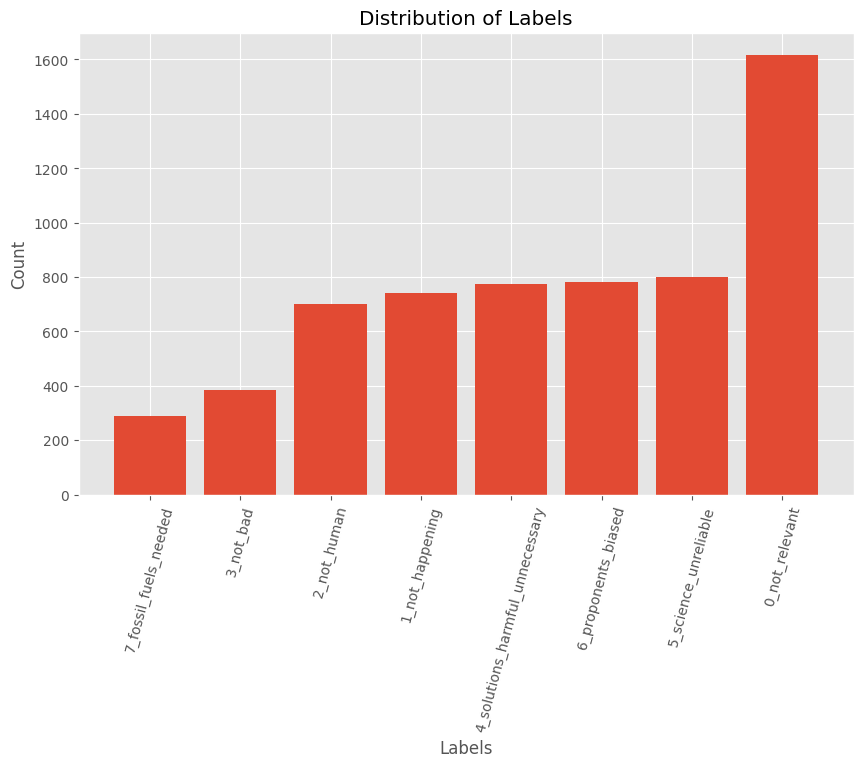

In [35]:
# Sort the labels by their count
sorted_labels = dict(sorted(labels.items(), key=lambda item: item[1]))

plt.figure(figsize=(10, 6))
plt.bar(sorted_labels.keys(), sorted_labels.values())
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.xticks(rotation=75)
plt.show()

The imbalance jumps out. There is a lot of `0_not_relevant` quotes than anything else. Since there is a lot of general discussion in the media other than climate topics, it makes sense.

In [56]:
pprint(dataset[:4])

{'__index_level_0__': [1109, 100, 4086, 3639],
 'id': [None, None, None, None],
 'label': ['0_not_relevant', '6_proponents_biased', '3_not_bad', '2_not_human'],
 'language': ['en', 'en', 'en', 'en'],
 'num_tokens': [26, 46, 41, 42],
 'quote': ['Interesting to note that Oklahoma minimum temperatures in 2011 '
           'were in the bottom ten, including the coldest Oklahoma temperature '
           'ever recorded, -31F on February 10, 2011.',
           'REPORT ON GEO ENGINEERING A.k.a. man-made FAKE climate change '
           'a.k.a. Chemtrails! We are sick and tired of the media not '
           'reporting this issue which is blocking out our sun and making our '
           'sky a pasty white color! This is the reason for the green new '
           'deal!!!',
           'To realize, yes, climate change is a real problem, but it’s not '
           'this catastrophic end of the world. There is nothing in the UN '
           'climate panel, the new report that came out from 2021–2022, 

In [6]:
from openai import OpenAI
from dotenv import dotenv_values

config = dotenv_values(".env")

In [7]:
client=OpenAI(api_key=config['OPENAI_API_KEY'])

In [28]:
def get_embeddings(texts, model="text-embedding-3-small", batch_size=1000):
    embeddings = []
    for batch_start in range(0, len(texts), batch_size):
        batch_end = batch_start + batch_size
        batch = texts[batch_start:batch_end]
        print(f"Batch {batch_start} to {batch_end-1}")
        response = client.embeddings.create(model=model, input=batch)
        for i, be in enumerate(response.data):
            assert i == be.index  # double check embeddings are in same order as input
        batch_embeddings = [e.embedding for e in response.data]
        embeddings.extend(batch_embeddings)
    return embeddings

In [23]:
# Use the function to get embeddings for the 'quote' column
quotes = dataset['quote']
embeddings = get_embeddings(quotes)

Batch 0 to 999
Batch 1000 to 1999
Batch 2000 to 2999
Batch 3000 to 3999
Batch 4000 to 4999
Batch 5000 to 5999
Batch 6000 to 6999


In [34]:
len(embeddings)

6091

In [32]:
embeddings[0][:10]

[-0.02947874739766121,
 0.03932640701532364,
 -0.00835980474948883,
 -0.013412080705165863,
 -0.013957983814179897,
 0.014364735223352909,
 0.003963146824389696,
 -0.062425583600997925,
 0.012170420028269291,
 0.03027084283530712]

In [35]:
updated_dataset = dataset.add_column('embedding', embeddings)

In [36]:
updated_dataset.column_names

['quote',
 'label',
 'source',
 'url',
 'language',
 'subsource',
 'id',
 '__index_level_0__',
 'num_tokens',
 'embedding']

In [38]:
updated_dataset.info.features

{'quote': Value(dtype='string', id=None),
 'label': Value(dtype='string', id=None),
 'source': Value(dtype='string', id=None),
 'url': Value(dtype='string', id=None),
 'language': Value(dtype='string', id=None),
 'subsource': Value(dtype='string', id=None),
 'id': Value(dtype='null', id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'num_tokens': Value(dtype='int64', id=None),
 'embedding': Sequence(feature=Value(dtype='float64', id=None), length=-1, id=None)}

In [39]:
remove_columns = ['source', 'url', 'language', 'subsource', 'id', '__index_level_0__', 'num_tokens']

In [48]:
updated_dataset = updated_dataset.remove_columns(remove_columns)

In [49]:
updated_dataset.column_names

['quote', 'label_names']

In [42]:
updated_dataset[0]

{'quote': 'Interesting to note that Oklahoma minimum temperatures in 2011 were in the bottom ten, including the coldest Oklahoma temperature ever recorded, -31F on February 10, 2011.',
 'label': '0_not_relevant',
 'embedding': [-0.02947874739766121,
  0.03932640701532364,
  -0.00835980474948883,
  -0.013412080705165863,
  -0.013957983814179897,
  0.014364735223352909,
  0.003963146824389696,
  -0.062425583600997925,
  0.012170420028269291,
  0.03027084283530712,
  -0.010345391929149628,
  -0.03453102335333824,
  -0.04786817729473114,
  0.02376282587647438,
  0.024961670860648155,
  0.01929926685988903,
  0.04377925768494606,
  0.03658618777990341,
  -0.06071294844150543,
  0.025454053655266762,
  -0.044999513775110245,
  -0.05120781809091568,
  -0.04525640606880188,
  -0.023612970486283302,
  0.03799911215901375,
  -0.037207018584012985,
  -0.018806884065270424,
  -0.04397192969918251,
  0.01834661327302456,
  0.019631091505289078,
  0.0008897679508663714,
  -0.026481635868549347,
  -0

In [43]:
updated_dataset.info.features

{'quote': Value(dtype='string', id=None),
 'label': Value(dtype='string', id=None),
 'embedding': Sequence(feature=Value(dtype='float64', id=None), length=-1, id=None)}

In [45]:
updated_dataset = dataset.rename_column("label", "label_names")

In [47]:
updated_dataset.info.features

{'quote': Value(dtype='string', id=None),
 'label_names': Value(dtype='string', id=None),
 'source': Value(dtype='string', id=None),
 'url': Value(dtype='string', id=None),
 'language': Value(dtype='string', id=None),
 'subsource': Value(dtype='string', id=None),
 'id': Value(dtype='null', id=None),
 '__index_level_0__': Value(dtype='int64', id=None),
 'num_tokens': Value(dtype='int64', id=None)}

In [44]:
# Define the label mapping
LABEL_MAPPING = {
    "0_not_relevant": 0,
    "1_not_happening": 1,
    "2_not_human": 2,
    "3_not_bad": 3,
    "4_solutions_harmful_unnecessary": 4,
    "5_science_unreliable": 5,
    "6_proponents_biased": 6,
    "7_fossil_fuels_needed": 7
}

In [ ]:
# Convert string labels to integers
dataset = dataset.map(lambda x: {"label": LABEL_MAPPING[x["label"]]})